In [18]:
from utils import * 
import numpy as np

URL = "http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-1K.tar.gz"
f_name = "lastfm-dataset-1K.tar.gz"
dir_name = "lastfm-dataset-1K"
dataset_f_name = "userid-timestamp-artid-artname-traid-traname.tsv"

In [19]:
download_dataset(URL, f_name)

Dataset Exists...


In [20]:
user_data = load_dataset(dir_name, dataset_f_name, 1000000)

Read File...


In [21]:
user_data[:10]

,userid,timestamp,artist-id,artist-name,track-id,track-name
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)
5,user_000001,2009-05-04T13:38:31Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,To Stanford (Live_2009_4_15)
6,user_000001,2009-05-04T13:33:28Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Improvisation (Live_2009_4_15)
7,user_000001,2009-05-04T13:23:45Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Glacier (Live_2009_4_15)
8,user_000001,2009-05-04T13:19:22Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Parolibre (Live_2009_4_15)
9,user_000001,2009-05-04T13:13:38Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Bibo No Aozora (Live_2009_4_15)


## Cleaning infrequent data

First remove infrequent tracks (<10 plays)

In [22]:
# Removing infrequent tracks.
if user_data['track-id'].isnull().sum() > 0:
    user_data = user_data.dropna(axis = 0, subset = ['track-id'])

In [23]:
user_data.shape

(865616, 6)

In [24]:
total_plays = user_data.groupby(["track-id"]).size().reset_index()
total_plays.rename(columns = {0: 'total'}, inplace = True)
total_plays.describe()

,total
count,126986.000000
mean,6.816625
std,25.337567
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,2069.000000


In [25]:
frequent_plays = total_plays[total_plays['total'] >= 10]['track-id']
frequent_plays.describe()

count                                    20666
unique                                   20666
top       8837c142-45e4-495f-abd9-4f3c016dfa52
freq                                         1
Name: track-id, dtype: object

In [26]:
# Drop infrequent tracks.
data = user_data[user_data['track-id'].isin(frequent_plays)]
data.describe()

,userid,timestamp,artist-id,artist-name,track-id,track-name
count,595039,595039,595039,595039,595039,595039
unique,41,592738,3331,3309,20666,19328
top,user_000033,2008-11-24T11:38:21Z,164f0d73-1234-4e2c-8743-d77bf2191051,Kanye West,82558949-cd98-4c58-af35-3f1a9430d52e,Heartless
freq,58772,24,26616,26616,2069,2120


Now, remove infrequent users.

In [27]:
# Removing infrequent tracks.
if data['userid'].isnull().sum() > 0:
    data = data.dropna(axis = 0, subset = ['userid'])

In [28]:
data.shape

(595039, 6)

In [29]:
user_plays = data.groupby(["userid"]).size().reset_index()
user_plays.rename(columns = {0: 'total'}, inplace = True)
user_plays.describe()

,total
count,41.000000
mean,14513.146341
std,15059.907282
min,176.000000
25%,3090.000000
50%,10437.000000
75%,18144.000000
max,58772.000000


In [30]:
frequent_users = user_plays[user_plays['total'] >= 10]['userid']
frequent_users.describe()

count              41
unique             41
top       user_000035
freq                1
Name: userid, dtype: object

In [31]:
# Drop infrequent tracks.
data = data[data['userid'].isin(frequent_users)]
data.describe()

,userid,timestamp,artist-id,artist-name,track-id,track-name
count,595039,595039,595039,595039,595039,595039
unique,41,592738,3331,3309,20666,19328
top,user_000033,2008-11-24T11:38:21Z,164f0d73-1234-4e2c-8743-d77bf2191051,Kanye West,82558949-cd98-4c58-af35-3f1a9430d52e,Heartless
freq,58772,24,26616,26616,2069,2120


## Listening Sessions

We create listening sessions for the ground-truth of top-n recommendations and for song2vec

In [32]:
user_play_counts=data.groupby(["userid"]).size().to_frame('size').reset_index()
user_play_counts

,userid,size
0,user_000001,6723
1,user_000002,42930
2,user_000003,10437
3,user_000004,8200
4,user_000005,13211
5,user_000006,10246
6,user_000007,182
7,user_000008,34997
8,user_000009,1857
9,user_000010,3090


In [33]:
groups=data.groupby('userid')
groups.groups

{'user_000001': Int64Index([   10,    12,    14,    15,    74,   174,   255,   256,   257,
               258,
             ...
             16653, 16654, 16655, 16659, 16667, 16669, 16676, 16682, 16683,
             16684],
            dtype='int64', length=6723),
 'user_000002': Int64Index([16685, 16686, 16696, 16697, 16698, 16704, 16705, 16708, 16710,
             16711,
             ...
             74112, 74113, 74114, 74115, 74117, 74118, 74119, 74120, 74121,
             74122],
            dtype='int64', length=42930),
 'user_000003': Int64Index([74127, 74128, 74144, 74147, 74161, 74163, 74164, 74165, 74166,
             74167,
             ...
             93602, 93603, 93605, 93606, 93611, 93612, 93613, 93614, 93615,
             93616],
            dtype='int64', length=10437),
 'user_000004': Int64Index([ 93622,  93627,  93635,  93637,  93638,  93639,  93648,  93649,
              93650,  93651,
             ...
             112007, 112008, 112010, 112016, 112019, 112020, 1

In [34]:
import datetime, dateutil.parser
sessions = []
sessions_user = []
for user, indices in groups.groups.iteritems():
    print("------------------------------------------ User ",user)
    user_record = data.loc[indices, :].sort_values(['timestamp'])
    print user_record.shape
#     print user_record.index
    session = [user_record.iloc[0].name]
    for i in range(0, user_record.shape[0] - 1):
        d1 = int(dateutil.parser.parse(user_record.iloc[i]['timestamp']).strftime('%s'))
        d2 = int(dateutil.parser.parse(user_record.iloc[i+1]['timestamp']).strftime('%s'))
        if(d2-d1 < 800 ):
            session.append(user_record.iloc[i+1].name)
        else:
            if(len(session)>10):
                sessions.append(session)
                sessions_user.append(user)
            session=[]
            session.append(user_record.iloc[i+1].name)
    

('------------------------------------------ User ', 'user_000038')
(7167, 6)
('------------------------------------------ User ', 'user_000039')
(11142, 6)
('------------------------------------------ User ', 'user_000036')
(1471, 6)
('------------------------------------------ User ', 'user_000037')
(2875, 6)
('------------------------------------------ User ', 'user_000034')
(11816, 6)
('------------------------------------------ User ', 'user_000035')
(1213, 6)
('------------------------------------------ User ', 'user_000032')
(12093, 6)
('------------------------------------------ User ', 'user_000033')
(58772, 6)
('------------------------------------------ User ', 'user_000030')
(10939, 6)
('------------------------------------------ User ', 'user_000031')
(12135, 6)
('------------------------------------------ User ', 'user_000014')
(176, 6)
('------------------------------------------ User ', 'user_000015')
(10161, 6)
('------------------------------------------ User ', 'user

## Storing id-name mappings

Forming an artist, track id-name mapping.

In [35]:
artists = data[["artist-id", "artist-name"]].drop_duplicates()


In [36]:
track = data[["track-id", "track-name"]].drop_duplicates()

Forming a mapping from artist to track

In [37]:
artist_track = data[["track-id", "artist-id"]].drop_duplicates()

## Playcount matrix

In [38]:
playcount = data.groupby(["userid", "track-id"]).size().reset_index()

In [39]:
playcount.rename(columns = {0: 'playcount'}, inplace = True)

In [40]:
playcount[:10]

,userid,track-id,playcount
0,user_000001,00b07689-ec4c-4773-94ce-06f3d198431e,4
1,user_000001,0198d56b-a92f-4596-a206-9e136f56e39f,21
2,user_000001,019cc5d9-1aaf-4687-b0af-6bc83bbccf0b,16
3,user_000001,01d866fc-7145-46af-ad7a-4133a477d54b,6
4,user_000001,02d30185-9d38-4f1c-9dac-63aa14f8cc69,1
5,user_000001,03156214-005e-456f-a5e3-0df32024fdad,16
6,user_000001,04049f3b-2fda-460f-a3ea-05f0418792c1,13
7,user_000001,04be389b-e44f-46c3-9ff3-2a0f0c3beda7,12
8,user_000001,05182b53-d942-4e39-9d87-3e62658898ff,14
9,user_000001,05ef9a7c-edab-4937-9c46-6bf572017d14,17


In [41]:
from scipy.sparse import csr_matrix

playcounts = playcount.pivot(index = 'userid', columns = 'track-id', values = 'playcount').fillna(0)


In [42]:
plays_matrix = csr_matrix(playcounts.values)
playcounts[:10]

track-id,0002c0b8-b737-49d8-a007-68d3bc2da175,0003dd36-b4d2-4216-a37e-b110f6882ecb,0005ebe2-6971-4de6-a8eb-5dff41f3b811,00063d3a-14a8-4748-8025-4b7cb828b37f,00087784-820c-4f71-b539-1f948b37befe,0019e275-6d9f-4ff8-bcd8-1bfce804163a,002017be-b745-42e4-aaf2-74a1c3879703,00226a83-ec86-4950-83de-650c3715e344,00271b0b-0459-4984-a3a5-a1f88e1136ca,002a1ae6-34bf-4687-b2ff-f78aaf7c74f5,...,ffddf0b4-d265-40e1-8950-f97207e86838,ffe2102d-4a5e-48b7-977a-0c28e2af119e,ffe3798a-44fd-4795-969c-2e14fc7083c8,ffea36e9-ae42-402d-ba47-2c1ef4cfca05,ffeaac69-dfd9-4159-950f-3981d5775b91,fff02100-41bf-440f-bcb8-f8998b6b1cc7,fff1607f-8763-460f-bf46-44da9c95a93a,fff7464a-d5db-4dd7-9c40-9e8deddf6063,fffada82-2845-44a0-a783-899f383e295e,fffe453c-b68b-4e43-9cef-b6767a587415
userid,,,,,,,,,,,,,,,,,,,,,
user_000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_000002,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
user_000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
user_000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_000005,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_000006,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_000007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
user_000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
playcounts.index

Index([u'user_000001', u'user_000002', u'user_000003', u'user_000004',
       u'user_000005', u'user_000006', u'user_000007', u'user_000008',
       u'user_000009', u'user_000010', u'user_000011', u'user_000012',
       u'user_000013', u'user_000014', u'user_000015', u'user_000016',
       u'user_000017', u'user_000018', u'user_000019', u'user_000020',
       u'user_000021', u'user_000022', u'user_000023', u'user_000024',
       u'user_000025', u'user_000026', u'user_000027', u'user_000028',
       u'user_000029', u'user_000030', u'user_000031', u'user_000032',
       u'user_000033', u'user_000034', u'user_000035', u'user_000036',
       u'user_000037', u'user_000038', u'user_000039', u'user_000040',
       u'user_000041'],
      dtype='object', name=u'userid')

## Conversion of Playcounts to Ratings

Based on work in A hybrid online-product recommendation system: Combining implicit
rating-based collaborative filtering and sequential pattern analysis by Choi et al.

Absolute Preference: AP(u, i) = ln((n(u played i)/n(u played anything)) + 1)

Relative Preference: RP(u, i) = AP(u,i) / Max_{c \in U} AP(c, i)

Implicit Rating: R(u, i) = Round up(5 * RP (u,i))

In [44]:
# List of number of songs ever played by each user. Reduces computation
user_plays = plays_matrix.sum(axis=1) # Sum all columns
print(user_plays[:20])
print(user_plays.shape)

#number_of_users

[[  6723.]
 [ 42930.]
 [ 10437.]
 [  8200.]
 [ 13211.]
 [ 10246.]
 [   182.]
 [ 34997.]
 [  1857.]
 [  3090.]
 [  3700.]
 [ 47121.]
 [  4220.]
 [   176.]
 [ 10161.]
 [ 11517.]
 [  3810.]
 [ 10566.]
 [ 22334.]
 [  2793.]]
(41, 1)


In [45]:
# Compute Absolute Rating
absolute_preferences = np.log(plays_matrix / user_plays + 1)

In [46]:
absolute_preferences.shape
n_users=absolute_preferences.shape[0]
n_items=absolute_preferences.shape[1]

In [47]:
# 2. List of maximum ratings of each item
max_ratings = absolute_preferences.max(axis=0) # Along columns
print(max_ratings[:10])
print(max_ratings.shape)

[[ 0.00077131  0.00054501  0.00105916 ...,  0.00215983  0.00067887
   0.00037263]]
(1, 20666)


In [48]:
print(max_ratings[max_ratings ==0].size)

0


In [49]:
print(user_plays[user_plays == 0].size)

0


In [50]:
print(max_ratings.shape)

(1, 20666)


In [51]:
# Relative Preference: RP(u, i) = AP(u,i) / Max_{c \in U} AP(c, i)
relative_preferences = absolute_preferences / (max_ratings)
print(absolute_preferences.shape)
print(relative_preferences.shape)

(41, 20666)
(41, 20666)


In [52]:
# Implicit Rating: R(u, i) = Round up(5 * RP (u,i))
implicit_ratings = np.ceil(5 * relative_preferences)

In [53]:
implicit_ratings.max(axis=1)
print(implicit_ratings[:10, :10])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [54]:
implicit_ratings.shape

(41, 20666)

In [1]:
from scipy import io
from scipy.sparse import csr_matrix

In [2]:
implicit_ratings = io.mmread("ratings.mtx")


## Test-Train Split

First, for rating matrix

In [3]:
import numpy as np
TRAIN_SIZE = 0.70
# Create boolean mask
# np.random creates a vector of random values between 0 and 1
# Those values are filtered to create a binary mask
msk = np.random.rand(implicit_ratings.shape[0],implicit_ratings.shape[1]) < TRAIN_SIZE
r = np.zeros(implicit_ratings.shape)
print (msk.shape)
 
train_ratings = implicit_ratings.copy()
test_ratings = implicit_ratings.copy()
    
train_ratings[~msk] = r[~msk]
test_ratings[msk] = r[msk] # inverse of boolean mask

(985, 268184)


In [4]:
test_ratings[msk].shape

(184901566,)

In [7]:
print(implicit_ratings[:6, :6])
print(train_ratings[:6, :6])
print(test_ratings[:6, :6])
print(implicit_ratings.shape)
print(train_ratings.shape)
print(test_ratings.shape)

[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
(985, 268184)
(985, 268184)
(985, 268184)


In [8]:
np.count_nonzero(test_ratings, axis=1)
# This means we can use test matrix as ground truth

array([ 265, 1307,  709,  868,  200,  453,   63,   72,  337,   94,  651,
       1490,  471,   44,  263, 1114, 1669,  197,  510,  352, 1268,  707,
        364, 1788, 1362,  668,  112,  538, 1254,  626, 2866,  226,  566,
        815,  283,  341,  323,  356,  303,  472,  833,  105, 1073,  313,
         42,  287,  288,   87,   33,  752,  411, 1153,  863,  876,  239,
        513,   66,  246,  959, 1431,  661,  374,  609,  451,   55,  619,
       1699,  529,  515,  172,  521,  271, 2022,  823,  290,   70,  615,
        573,   55,   95,  529,  650,  245,  277,  864,  468,   19, 1569,
        269, 1145,  259,  701,  531, 1050,  947, 1936,   39,   55,  347,
         18,  741,  544,  486,  320,   65,  991, 1582,  333,  502,  180,
       1178,  393,  555,  215, 1104,  442,  155,  387, 1091,  686,  409,
        528,  183,  506,  109,  211,  151, 1090,  345, 1537,  493,  576,
       1252, 1825,  293,  524,  185,  315,   28,  223,  894,   44,   87,
        327,   16,  932,  358, 2534,  118,  607,  5

Now for listening sessions aka top-n recommendations train set is the same because we just learn the ratings and predict the best.

In [9]:
# We take the test ratings
y_rec = []
# now we need to sort each row
for u in test_ratings:
    indices = np.nonzero(u)[1]
    nz = indices[np.argsort(u[:,indices], axis=None)]
    y_rec.append(nz[::-1])
print len(y_rec)
print y_rec[:1]

IndexError: tuple index out of range

In [60]:
scoring_ranks = [data.loc[s, ['track-id']].values.flatten() for s in sessions]

In [61]:
# from sets import Set 
# users = Set(sessions_user)
# y_rec = []
# y_rec_label = []
# for u in users:
#     indices = [i for i,U in enumerate(sessions_user) if U == u]
# #     print np.concatenate([scoring_ranks[i] for i in indices])
#     y_rec.append(np.concatenate([scoring_ranks[i] for i in indices]))
#     y_rec_label.append(u)
#     print "%s done..." % u
# print len(y_rec)
# print y_rec

In [62]:
len(sessions)

14346

## Metrics

We use the following metrics

### For Rating Prediction

#### Mean Absolute Error

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/3ef87b78a9af65e308cf4aa9acf6f203efbdeded)


#### Root Mean Square Error

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/24a21c4e87218f03bdc76d7b858b93ed448d7682)


### For Top-n Recommendations

#### Precision at k

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/95eeb143dd5ded21c882eaa4530ec69739a3a218)

Here, documents are each record.


#### Mean Average Precision at k

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64788ba190d585f3837f9d10fe24f3b9689dba4b)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/decf93706ec7c8632fdfabe41470962101f9bcd8)

#### Truncated Normalized Discounted Cumulative Gain (NDCG@K)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c7cf810f95722b0add5a9efb17b47215ada9e168)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/7f28a12199cde773a6897d5f3021d4e2d3b2f0fe)

In [63]:
from metrics import * 

In [4]:
#type(implicit_ratings)
ratings = np.array(implicit_ratings)
test_r = np.array(test_ratings)
train_r = np.array(train_ratings)

In [6]:
print np.count_nonzero(test_r)
print np.count_nonzero(train_r)

868936
2026968


In [65]:
ratings

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2.,  0., ...,  0.,  0.,  5.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [66]:
test_r

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  5.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [67]:
train_r

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [5]:
n_users, n_items = implicit_ratings.shape
print (n_users)
print (n_items)
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

985
268184
Sparsity: 1.10%


In [6]:
#from bmf import *
import numpy as np2
class MF():
    
    def __init__(self, R, Rte, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.
        
        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """
        
        self.R = R
        self.Rte = Rte
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        self.rms_error = 0.0
        self.rmse = []
        self.mae = 0.0

    def train(self):
        # Initialize user and item latent feature matrice
        self.P = np2.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np2.random.normal(scale=1./self.K, size=(self.num_items, self.K))
        
        # Initialize the biases
        self.b_u = np2.zeros(self.num_users)
        self.b_i = np2.zeros(self.num_items)
        self.b = np2.mean(self.R[np2.where(self.R != 0)])
        
        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]
        
        # Perform stochastic gradient descent for number of iterations
        training_process = []
        for i in range(self.iterations):
            np2.random.shuffle(self.samples)
            self.sgd()
            mse, mae_1 = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                self.rmse.append(mse)
                print("Iteration: %d ; error = %.4f" % (i+1, mse))
        
        rms_error = mse
        mae = mae_1
        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.Rte.nonzero()
        predicted = self.full_matrix()
        error = 0.0
        count = 0
        number = 0
        mae_1 = 0.0
        for x, y in zip(xs, ys):
            number += 1
            err =  pow(self.Rte[x, y] - predicted[x, y], 2)
            ae_1 = abs(self.Rte[x, y] - predicted[x, y])
            if(err>0):
                count += 1
                error += err 
                mae_1 += ae_1
        
        print("Count: %d " %count)
        print("Number: %d" %number)
        print("error: %d" %error)
        if count != 0 :       
            error = error/count
            mae_1 = mae_1/count
            
        return np2.sqrt(error), mae_1

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            e = (r - prediction)
            
            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])
            
            # Update user and item latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction
    
    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """ 
        return self.b + self.b_u[:,np2.newaxis] + self.b_i[np2.newaxis:,] + self.P.dot(self.Q.T)
        #return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [18]:
# print(rmse)
# print(num_f)
rmse = []
bmf = MF(train_r, test_r, K=8, alpha=0.01, beta=0.01, iterations=100)
training_process = bmf.train()
rmse.append(bmf.rmse)

Count: 868936 
Number: 868936
error: 1223185
Count: 868936 
Number: 868936
error: 1178333
Count: 868936 
Number: 868936
error: 1151422
Count: 868936 
Number: 868936
error: 1133960
Count: 868936 
Number: 868936
error: 1123439
Count: 868936 
Number: 868936
error: 1117559
Count: 868936 
Number: 868936
error: 1117653
Count: 868936 
Number: 868936
error: 1122074
Count: 868936 
Number: 868936
error: 1131460
Count: 868936 
Number: 868936
error: 1144601
Iteration: 10 ; error = 1.1477
Count: 868936 
Number: 868936
error: 1158932
Count: 868936 
Number: 868936
error: 1173117
Count: 868936 
Number: 868936
error: 1186135
Count: 868936 
Number: 868936
error: 1197867
Count: 868936 
Number: 868936
error: 1207848
Count: 868936 
Number: 868936
error: 1216930
Count: 868936 
Number: 868936
error: 1225244
Count: 868936 
Number: 868936
error: 1232396
Count: 868936 
Number: 868936
error: 1239421
Count: 868936 
Number: 868936
error: 1246088
Iteration: 20 ; error = 1.1975
Count: 868936 
Number: 868936
error: 1

NameError: name 'num_f' is not defined

In [ ]:
rmse

In [19]:

num_f = []
num_f.append(bmf.K)
bmf = MF(train_r, test_r, K=16, alpha=0.01, beta=0.01, iterations=100)
training_process = bmf.train()



Count: 868936 
Number: 868936
error: 1222644
Count: 868936 
Number: 868936
error: 1176192
Count: 868936 
Number: 868936
error: 1149700
Count: 868936 
Number: 868936
error: 1130816
Count: 868936 
Number: 868936
error: 1117991
Count: 868936 
Number: 868936
error: 1109432
Count: 868936 
Number: 868936
error: 1103461
Count: 868936 
Number: 868936
error: 1103114
Count: 868936 
Number: 868936
error: 1107707
Count: 868936 
Number: 868936
error: 1116598
Iteration: 10 ; error = 1.1336
Count: 868936 
Number: 868936
error: 1128203
Count: 868936 
Number: 868936
error: 1139374
Count: 868936 
Number: 868936
error: 1149849
Count: 868936 
Number: 868936
error: 1158880
Count: 868936 
Number: 868936
error: 1167208
Count: 868936 
Number: 868936
error: 1174673
Count: 868936 
Number: 868936
error: 1181165
Count: 868936 
Number: 868936
error: 1186984
Count: 868936 
Number: 868936
error: 1192141
Count: 868936 
Number: 868936
error: 1196693
Iteration: 20 ; error = 1.1735
Count: 868936 
Number: 868936
error: 1

KeyboardInterrupt: 

In [25]:
rmse.append(bmf.rmse)
num_f.append(bmf.K)

In [ ]:
bmf = MF(train_r, test_r, K=32, alpha=0.01, beta=0.01, iterations=100)
training_process = bmf.train()
rmse.append(bmf.rmse)
num_f.append(bmf.K)
bmf = MF(train_r, test_r, K=64, alpha=0.01, beta=0.01, iterations=100)
training_process = bmf.train()
rmse.append(bmf.rmse)
num_f.append(bmf.K)
bmf = MF(train_r, test_r, K=128, alpha=0.01, beta=0.01, iterations=100)
training_process = bmf.train()
rmse.append(bmf.rmse)
num_f.append(bmf.K)
bmf = MF(train_r, test_r, K=256, alpha=0.01, beta=0.01, iterations=100)
training_process = bmf.train()
rmse.append(bmf.rmse)
num_f.append(bmf.K)

Count: 868936 
Number: 868936
error: 1221660
Count: 868936 
Number: 868936
error: 1175740
Count: 868936 
Number: 868936
error: 1148776
Count: 868936 
Number: 868936
error: 1130248
Count: 868936 
Number: 868936
error: 1114388
Count: 868936 
Number: 868936
error: 1099703
Count: 868936 
Number: 868936
error: 1084350
Count: 868936 
Number: 868936
error: 1072752
Count: 868936 
Number: 868936
error: 1069511
Count: 868936 
Number: 868936
error: 1071567
Iteration: 10 ; error = 1.1105
Count: 868936 
Number: 868936
error: 1078920
Count: 868936 
Number: 868936
error: 1087168
Count: 868936 
Number: 868936
error: 1095322
Count: 868936 
Number: 868936
error: 1103170
Count: 868936 
Number: 868936
error: 1109518
Count: 868936 
Number: 868936
error: 1115213
Count: 868936 
Number: 868936
error: 1120167
Count: 868936 
Number: 868936
error: 1124353
Count: 868936 
Number: 868936
error: 1128152
Count: 868936 
Number: 868936
error: 1131752
Iteration: 20 ; error = 1.1413
Count: 868936 
Number: 868936
error: 1

error: 1109801
Count: 868936 
Number: 868936
error: 1110019
Count: 868936 
Number: 868936
error: 1110490
Count: 868936 
Number: 868936
error: 1110804
Count: 868936 
Number: 868936
error: 1111310
Count: 868936 
Number: 868936
error: 1111555
Count: 868936 
Number: 868936
error: 1111936
Count: 868936 
Number: 868936
error: 1112276
Count: 868936 
Number: 868936
error: 1112592
Count: 868936 
Number: 868936
error: 1112912
Iteration: 80 ; error = 1.1317
Count: 868936 
Number: 868936
error: 1113337
Count: 868936 
Number: 868936
error: 1113765
Count: 868936 
Number: 868936
error: 1114053
Count: 868936 
Number: 868936
error: 1114377
Count: 868936 
Number: 868936
error: 1114678
Count: 868936 
Number: 868936
error: 1115126
Count: 868936 
Number: 868936
error: 1115426
Count: 868936 
Number: 868936
error: 1115603
Count: 868936 
Number: 868936
error: 1116190
Count: 868936 
Number: 868936
error: 1116422
Iteration: 90 ; error = 1.1335
Count: 868936 
Number: 868936
error: 1116788
Count: 868936 
Number: 

In [7]:
rmse = []
num_f=[]
bmf = MF(train_r, test_r, K=128, alpha=0.01, beta=0.01, iterations=100)
training_process = bmf.train()
rmse.append(bmf.rmse)
num_f.append(bmf.K)

Count: 868213 
Number: 868213
error: 1222325
Count: 868213 
Number: 868213
error: 1176448
Count: 868213 
Number: 868213
error: 1149161
Count: 868213 
Number: 868213
error: 1129885
Count: 868213 
Number: 868213
error: 1115567
Count: 868213 
Number: 868213
error: 1103798
Count: 868213 
Number: 868213
error: 1090160
Count: 868213 
Number: 868213
error: 1071579
Count: 868213 
Number: 868213
error: 1054038
Count: 868213 
Number: 868213
error: 1041392
Iteration: 10 ; error = 1.0952
Count: 868213 
Number: 868213
error: 1033409
Count: 868213 
Number: 868213
error: 1029520
Count: 868213 
Number: 868213
error: 1028513
Count: 868213 
Number: 868213
error: 1029226
Count: 868213 
Number: 868213
error: 1030644
Count: 868213 
Number: 868213
error: 1032201
Count: 868213 
Number: 868213
error: 1033568
Count: 868213 
Number: 868213
error: 1034775
Count: 868213 
Number: 868213
error: 1036072
Count: 868213 
Number: 868213
error: 1037057
Iteration: 20 ; error = 1.0929
Count: 868213 
Number: 868213
error: 1

Count: 868936 
Number: 868936
error: 1222510
Count: 868936 
Number: 868936
error: 1177614
Count: 868936 
Number: 868936
error: 1151439
Count: 868936 
Number: 868936
error: 1134463
Count: 868936 
Number: 868936
error: 1123555


NameError: name 'rmse' is not defined

In [ ]:
num_f1=[]
rmse1=[]
it = [20, 40, 60, 80, 100]

for i in it: 
    rmse=[]
    num_f=[]
    bmf = MF(train_r, test_r, K=8, alpha=0.1, beta=0.01, iterations=i)
    training_process = bmf.train()
    rmse.append(float(bmf.mse()))
    num_f.append(bmf.K)
    
    bmf = MF(train_r, test_r, K=16, alpha=0.1, beta=0.01, iterations=i)
    training_process = bmf.train()
    rmse.append(float(bmf.mse()))
    num_f.append(bmf.K)
    
    bmf = MF(train_r, test_r, K=32, alpha=0.1, beta=0.01, iterations=i)
    training_process = bmf.train()
    rmse.append(float(bmf.mse()))
    num_f.append(bmf.K)
    
    bmf = MF(train_r, test_r, K=64, alpha=0.1, beta=0.01, iterations=i)
    training_process = bmf.train()
    rmse.append(float(bmf.mse()))
    num_f.append(bmf.K)
    
    bmf = MF(train_r, test_r, K=128, alpha=0.1, beta=0.01, iterations=i)
    training_process = bmf.train()
    rmse.append(float(bmf.mse()))
    num_f.append(bmf.K)
    
    
    rmse1.append(rmse)
    num_f1.append(num_f)
    



In [ ]:
rmse2=[rmse1]
num_f2=[num_f1]

In [ ]:
rmse2.append(rmse1)
num_f1=[]
rmse1=[]
it = [20, 40, 60, 80, 100]
a=0.05
for i in it: 
    rmse=[]
    num_f=[]
    mf = MF(train_r, test_r, K=8, alpha=a, beta=a, iterations=i)
    training_process = mf.train()
    rmse.append(float(mf.mse()))
    num_f.append(mf.K)
    mf = MF(train_r, test_r, K=16, alpha=a, beta=a, iterations=i)
    training_process = mf.train()
    rmse.append(float(mf.mse()))
    num_f.append(mf.K)
    mf = MF(train_r, test_r, K=32, alpha=a, beta=a, iterations=i)
    training_process = mf.train()
    rmse.append(float(mf.mse()))
    num_f.append(mf.K)
    mf = MF(train_r, test_r, K=64, alpha=a, beta=a, iterations=i)
    training_process = mf.train()
    rmse.append(float(mf.mse()))
    num_f.append(mf.K)
    mf = MF(train_r, test_r, K=128, alpha=a, beta=a, iterations=i)
    training_process = mf.train()
    rmse.append(float(mf.mse()))
    num_f.append(mf.K)
    rmse1.append(rmse)
    num_f1.append(num_f)
    num_f2.append(num_f1)

In [ ]:


num_f1=[]
rmse1=[]
it = [20, 40, 60, 80, 100]
a=0.05
for i in it: 
    rmse=[]
    num_f=[]
    mf = MF(train_r, test_r, K=8, alpha=a, beta=a, iterations=i)
    training_process = mf.train()
    rmse.append(float(mf.mse()))
    num_f.append(mf.K)
    mf = MF(train_r, test_r, K=16, alpha=a, beta=a, iterations=i)
    training_process = mf.train()
    rmse.append(float(mf.mse()))
    num_f.append(mf.K)
    mf = MF(train_r, test_r, K=32, alpha=a, beta=a, iterations=i)
    training_process = mf.train()
    rmse.append(float(mf.mse()))
    num_f.append(mf.K)
    mf = MF(train_r, test_r, K=64, alpha=a, beta=a, iterations=i)
    training_process = mf.train()
    rmse.append(float(mf.mse()))
    num_f.append(mf.K)
    mf = MF(train_r, test_r, K=128, alpha=a, beta=a, iterations=i)
    training_process = mf.train()
    rmse.append(float(mf.mse()))
    num_f.append(mf.K)
    rmse1.append(rmse)
    num_f1.append(num_f)

In [ ]:
rmse2.append(rmse1)
num_f2.append(num_f1)

In [22]:
import matplotlib.pyplot as plt2
plt2.clf()
rmse = [1.2843, 1.2617, 1.2323, 1.2251, 1.2163]
x_points=[1, 2, 3, 4, 5]
y_points=[1.14, 1.18, 1.22, 1.26, 1.30]
num_f = [8, 16, 32, 64, 128]
plt2.xticks(x_points, num_f)
#plt2.yticks(y_points) 
plt2.plot(x_points, rmse, 'bo--', label='bmf')#y_points, '--', marker='o', color='b', y_points, label='bmf')
plt2.xticks(fontsize=8);
plt2.yticks(fontsize=8);
plt2.xlabel('d(number of factors)', fontsize=8);
plt2.ylabel('RMSE', fontsize=10);
#plt.legend(loc='best', fontsize=10);
#plt.savefig('bmf.png')

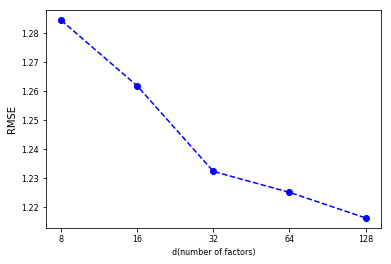

In [23]:
plt2.show()

In [ ]:
from msbmf import *

In [ ]:
print test_ratings.shape
sim = np.random.normal(scale=1./8, size=(train_ratings.shape[1], 10))

In [ ]:
msmf = MSBMF(train_r, test_r, S=sim, D=8,k=3, alpha=1, l=1,eta=0.05, iterations=100)
# R, Rte, S, D, k, alpha, l, eta, iterations)
training_process = msmf.train()
print float(msmf.mse())

In [69]:
import mrec

In [74]:
# from mswrmf import *
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

from mrec.sparse import fast_sparse_matrix
from mrec.mf.recommender import MatrixFactorizationRecommender

class MSWRMF(MatrixFactorizationRecommender):
    """
    Parameters
    ==========
    d : int
        Number of latent factors.
    alpha : float
        Confidence weight, confidence c = 1 + alpha*r where r is the observed "rating".
    lbda : float
        Regularization constant.
    num_iters : int
        Number of iterations of alternating least squares.
    """

    def __init__(self,d,k,a, alpha=1,lbda=0.015,num_iters=15):
        self.d = d
        self.k = k
        self.a = a
        self.alpha = alpha
        self.lbda = lbda
        self.num_iters = num_iters

        # R, Rte, S, D, k, alpha, l, eta, iterations

    def __str__(self):
        return 'WRMFRecommender (d={0},alpha={1},lambda={2},num_iters={3})'.format(self.d,self.alpha,self.lbda,self.num_iters)

    def init_factors(self,num_factors,assign_values=True):
        if assign_values:
            return self.d**-0.5*np.random.random_sample((num_factors,self.d))
        return np.empty((num_factors,self.d))

    def fit(self,train,S,item_features=None):
        """
        Learn factors from training set. User and item factors are
        fitted alternately.
        Parameters
        ==========
        train : scipy.sparse.csr_matrix or mrec.sparse.fast_sparse_matrix
            User-item matrix.
        S: item similaities
        item_features : array_like, shape = [num_items, num_features]
            Features for each item in the dataset, ignored here.
        """
        self.S = S
        nbrs = NearestNeighbors(n_neighbors=self.k + 1).fit(self.S)
        # Does contain itself, hence k + 1
        self.k_distances, self.k_indices = nbrs.kneighbors(self.S)

        if type(train) == csr_matrix:
            train = fast_sparse_matrix(train)

        num_users,num_items = train.shape

        self.U = self.init_factors(num_users,False)  # don't need values, will compute them
        self.V = self.init_factors(num_items) # Items
        for it in xrange(self.num_iters):
            print 'iteration',it
            # fit user factors
            VV = self.V.T.dot(self.V)
            for u in xrange(num_users):
                # get (positive i.e. non-zero scored) items for user
                indices = train.X[u].nonzero()[1]
                if indices.size:
                    self.U[u,:] = self.update(indices,self.V,VV)
                else:
                    self.U[u,:] = np.zeros(self.d)
            # fit item factors
            UU = self.U.T.dot(self.U)
            for i in xrange(num_items):
                indices = train.fast_get_col(i).nonzero()[0]
                if indices.size:
                    self.V[i,:] = self.update(indices,self.U,UU)
                else:
                    self.V[i,:] = np.zeros(self.d)

    # # Backprop rule also contains si,j term hiii
    #         similarity_factor = np.zeros_like(self.Q[j, :])
    #         for x, d in enumerate(self.k_distances[j]):
    #             similarity_factor += (d - self.Q[j, :].dot(self.Q[self.k_indices[i][x], :].T)) * (self.Q[self.k_indices[i][x], :])
    #         self.Q[j, :] += self.eta * (e * self.P[i, :] - self.l * self.Q[j,:] - self.alpha * similarity_factor)

    #  NOW WE NEED A DIFFERENT UPDATE RULE FOR ITEM AND USERS

    def update(self,indices,H,HH):
        """
        Update latent factors for a single user.
        """
        Hix = H[indices,:]
        M = HH + self.alpha*Hix.T.dot(Hix) + np.diag(self.lbda*np.ones(self.d))
        return np.dot(np.linalg.inv(M),(1+self.alpha)*Hix.sum(axis=0))

    def update_item(self,indices,H,HH):
        """
        Update latent factors for a single item.
        """
        Hix = H[indices,:]
        for x, d in enumerate(self.k_distances[j]):
            Hix -= self.a * self.V[j, :].dot(self.V[self.k_indices[i][x], :].T) * (self.V[self.k_indices[i][x], :])
        M = HH + self.alpha*Hix.T.dot(Hix) + np.diag(self.lbda*np.ones(self.d))
        for x, d in enumerate(self.k_distances[j]):
            M -= self.a * d * (self.V[self.k_indices[i][x], :])
        return np.dot(np.linalg.inv(M),(1+self.alpha)*Hix.sum(axis=0))



In [75]:
# msmf = MSBMF(train_r, test_r, S=sim, D=8,k=3, alpha=1, l=1,eta=0.05, iterations=100)
mswrmf = MSWRMF(d=8,k=5, a=0.1, num_iters=10)
# R, Rte, S, D, k, alpha, l, eta, iterations)
from scipy.sparse import csr_matrix
training_process = mswrmf.fit(csr_matrix(train_r), sim)
# print float(msmf.mse())

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


In [76]:
n_rec = mswrmf.batch_recommend_items(csr_matrix(train_r),max_items=10,return_scores=False)

In [77]:
n_rec

[[16084, 15452, 5826, 2829, 12409, 11562, 3438, 16922, 2813, 4006],
 [19830, 10817, 19851, 8764, 16866, 17651, 7553, 12331, 18369, 4000],
 [975, 496, 4845, 19264, 2064, 14836, 16295, 17040, 13924, 12478],
 [16510, 5826, 4146, 14722, 16552, 19473, 2829, 3070, 7993, 8220],
 [3438, 19650, 10035, 4006, 20089, 6370, 2235, 1296, 744, 496],
 [19058, 17842, 12910, 15728, 11544, 9125, 8216, 7234, 17241, 19428],
 [19264, 19543, 496, 10267, 2870, 14836, 16167, 18527, 9860, 4845],
 [17842, 496, 11539, 12910, 8129, 2295, 2705, 19058, 19264, 15728],
 [16167, 16295, 19264, 496, 8216, 19058, 2223, 13753, 9604, 19543],
 [2223, 16167, 16295, 9102, 496, 3795, 6677, 3475, 10515, 19501],
 [9001, 10515, 3795, 16295, 3317, 6677, 7999, 10012, 496, 19543],
 [15850, 16737, 3940, 19283, 4243, 4006, 1399, 7128, 9102, 3475],
 [17241, 1296, 11562, 3317, 3415, 4006, 5680, 6982, 6469, 19428],
 [12910, 11544, 15728, 9125, 496, 11562, 2295, 2705, 4657, 8129],
 [496, 19264, 16167, 19543, 11129, 4845, 7128, 19650, 9860, 

In [78]:
len(n_rec)

41

In [79]:
len(y_rec)

41

In [80]:
from metrics import *

In [81]:
# from metrics import *
print ("MAP@k",mean_average_precision(y_rec, n_rec, 10))
print ("P@k",precision_k(y_rec, n_rec, 10))

('MAP@k', 0.71651180797522251)
('P@k', 0.16829268292682928)


In [82]:
# NDCG also takes the ratings into account  test_ratings
print ("NDCG@k",ndcg_k(y_rec, n_rec, test_r, 10))

('NDCG@k', 0.37227123340336288)
